### 합성곱  신경망

In [ ]:
# cnn 
# 컨브넷
# 28, 28 , 1
import tensorflow as tf
from tensorflow.keras import layers
inputs = tf.keras.Input(shape = (28,28,1))
conv = layers.Conv2D(32,(3,3), activation='relu')(inputs)
conv = layers.MaxPooling2D()(conv)
conv = layers.Conv2D(64,(3,3), activation ='relu')(conv)
conv = layers.MaxPooling2D()(conv)
conv = layers.Conv2D(128,(3,3), activation ='relu')(conv)

In [2]:
flatlayer = layers.Flatten()(conv)
outputs =  layers.Dense(10,activation='softmax')(flatlayer)

In [3]:
model = tf.keras.Model(inputs = inputs, outputs = outputs)

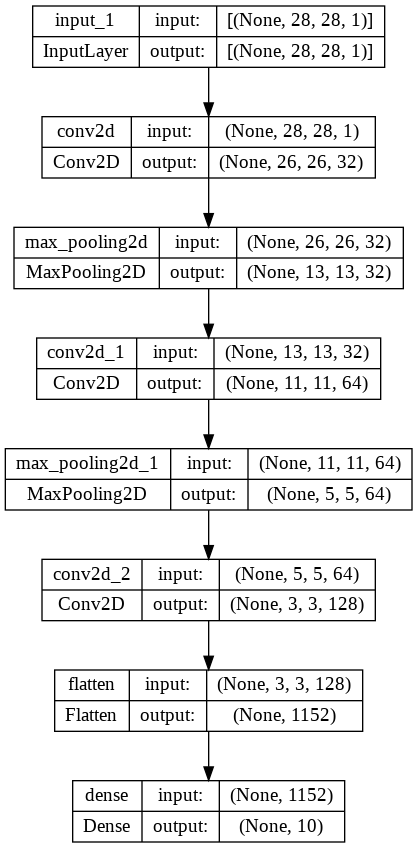

In [4]:
# model.summary()
tf.keras.utils.plot_model(model,show_shapes=True)

In [5]:
# 데이터 준비하기
# MNIST 이미지
from tensorflow.keras.datasets import mnist
import numpy as np

In [6]:
(x_train,y_train),(x_test,y_test) =  mnist.load_data()
# convolution은 3차원 텐서이기 때문에 차수를 맞춰준다.
x_train = np.expand_dims(x_train,axis = -1)
x_test = np.expand_dims(x_test,axis = -1)

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
# 데이터 스케일링
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 12s 4ms/step - loss: 0.1677 - accuracy: 0.9489
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0480 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0337 - accuracy: 0.9892
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0257 - accuracy: 0.9921
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0205 - accuracy: 0.9932


In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0252 - accuracy: 0.9923


[0.02524450421333313, 0.9922999739646912]

#### 폴링층의누락

In [10]:
conv2 = layers.Conv2D(32,(3,3),activation='relu')(inputs)
conv2 = layers.Conv2D(64,(3,3),activation='relu')(conv2)
conv2 = layers.Conv2D(128,(3,3),activation='relu')(conv2)
conv2 = layers.Flatten()(conv2)
outputs = layers.Dense(10,activation='softmax')(conv2)
model2 = tf.keras.Model(inputs=inputs,outputs=outputs)

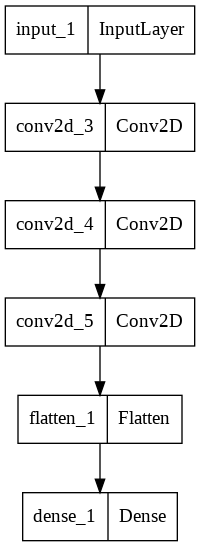

In [11]:
tf.keras.utils.plot_model(model2)

In [12]:
model2.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model2.fit(x_train,y_train,epochs=5,batch_size=64)
model2.evaluate(x_test,y_test)

Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.1152 - accuracy: 0.9647
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0419 - accuracy: 0.9870
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0260 - accuracy: 0.9917
Epoch 4/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0188 - accuracy: 0.9937
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0442 - accuracy: 0.9880


[0.04418446123600006, 0.9879999756813049]

#### 작은 데이터셋 문제에서 딥러닝의 타당성

In [13]:
# !pip install gdown

In [14]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From: https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
To: /content/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:13<00:00, 61.4MB/s]


'dogs-vs-cats.zip'

In [15]:
# import zipfile

In [16]:
!unzip -qq 'dogs-vs-cats.zip'

In [17]:
!unzip -qq 'train.zip'
!unzip -qq 'test1.zip'

In [ ]:
# zipfile.ZipFile('D:/leeky_ai/dogs-vs-cats.zip').extractall()
# zipfile.ZipFile('D:/leeky_ai/train.zip').extractall()

#### 이미지를 훈련,검증,테스트 디렉터리로 복사

In [18]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [19]:
original_dir, new_base_dir

(PosixPath('train'), PosixPath('cats_vs_dogs_small'))

In [20]:
def make_subset(subset_name, start_index, end_index):
    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [ f"{category}.{i}.jpg" for i in range(start_index,end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir/fname, dst=dir/fname)

In [22]:
make_subset("train", start_index=0, end_index=1000)

In [23]:
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### 데이터 전처리  이미지 데이터를 수치형으로 변환

In [24]:
from tensorflow.keras.utils import image_dataset_from_directory
new_base_dir

PosixPath('cats_vs_dogs_small')

In [25]:
train_dataset =  image_dataset_from_directory(
    new_base_dir/"train"    
)
validation_dataset =  image_dataset_from_directory(
    new_base_dir/"validation"    
)
test_dataset =  image_dataset_from_directory(
    new_base_dir/"test"    
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [26]:
import numpy as np
import tensorflow as tf
random_numbers =  np.random.normal(size=(1000,16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [27]:
len(dataset)

1000

In [28]:
for i, element in enumerate(dataset):
    if i > 2: break
    print(element.shape)

(16,)
(16,)
(16,)


In [29]:
batch_dataset =  dataset.batch(32)
for i, element in enumerate(batch_dataset):
    if i>2 : break
    print(element.shape)

(32, 16)
(32, 16)
(32, 16)


In [30]:
reshape_dataset =  dataset.map(lambda x: tf.reshape(x, (4,4)))
for i, element in enumerate(reshape_dataset):
    if i>2 : break
    print(element.shape)

(4, 4)
(4, 4)
(4, 4)


#### dataset이 반환하는 데이터와 레이블 크기 확인

In [31]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:",labels_batch.shape)
    break

데이터 배치 크기: (32, 256, 256, 3)
레이블 배치 크기: (32,)


#### 모델 만들기

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
inputs = keras.Input(shape=(256, 256, 3))
x = layers.Rescaling(1/255.0)(inputs)
x = layers.Conv2D(32,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,(3,3),activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convert_from_scratch.keras',
        save_best_only=True,
        monitor = 'val_loss'
    )
]

In [36]:
hist = model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 11s 139ms/step - loss: 0.6999 - accuracy: 0.5160 - val_loss: 0.6837 - val_accuracy: 0.5220
Epoch 2/30
63/63 [==============================] - 8s 122ms/step - loss: 0.6951 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.4960
Epoch 3/30
63/63 [==============================] - 8s 120ms/step - loss: 0.6931 - accuracy: 0.4950 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/30
63/63 [==============================] - 8s 120ms/step - loss: 0.6933 - accuracy: 0.5065 - val_loss: 0.6893 - val_accuracy: 0.4930
Epoch 5/30
63/63 [==============================] - 8s 120ms/step - loss: 0.6882 - accuracy: 0.5225 - val_loss: 0.6795 - val_accuracy: 0.5450
Epoch 6/30
63/63 [==============================] - 8s 120ms/step - loss: 0.6773 - accuracy: 0.5740 - val_loss: 0.6529 - val_accuracy: 0.6430
Epoch 7/30
63/63 [==============================] - 8s 119ms/step - loss: 0.6496 - accuracy: 0.6170 - val_loss: 0.6574 - val_accuracy: 0.5910
Epoch

### 훈련 정확도와 손실 그래프 그리기

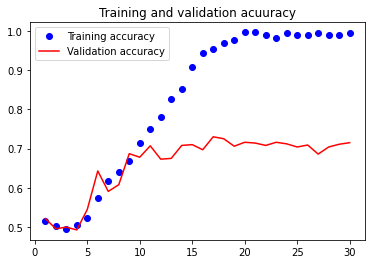

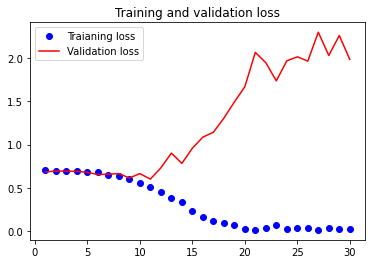

In [42]:
from numpy.random.mtrand import exponential
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1,len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo',label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r',label='Validation accuracy')
plt.title('Training and validation acuuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo', label = 'Traianing loss')
plt.plot(epochs,val_loss,'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 오버핏

In [ ]:
test_model = keras.models.load_model('convert_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
test_loss, test_acc

In [ ]:
test_loss, test_acc

### 데이터 증식기 이용
컨볼루션에 추가할 데이터 증식 단계 정의

In [45]:
data_agumentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

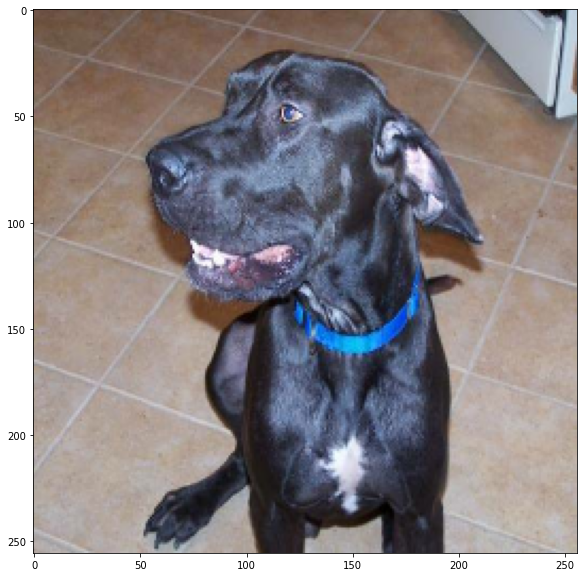

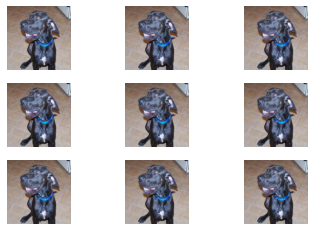

In [59]:
plt.figure(figsize=(10,10))
for images,_ in train_dataset.take(1):
  plt.imshow(images[0].numpy().astype('uint8'))
  plt.figure()
  for i in range(9):
    new_images = data_agumentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(new_images[0].numpy().astype('uint8'))
    plt.axis('off')

### 이미지 증식과 드랍아웃을 포함한 컨볼루션

In [58]:
inputs = keras.Input(shape=(256, 256, 3))
x = data_agumentation(inputs)
x = layers.Rescaling(1/255.0)(inputs)
x = layers.Conv2D(32,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,(3,3),activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,(3,3),activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convert_from_with_imagesGenerator_scratch.keras',
        save_best_only=True,
        monitor = 'val_loss'
    )
]
hist = model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 9s 128ms/step - loss: 0.6996 - accuracy: 0.5095 - val_loss: 0.6873 - val_accuracy: 0.5470
Epoch 2/30
63/63 [==============================] - 8s 119ms/step - loss: 0.6865 - accuracy: 0.5385 - val_loss: 0.6808 - val_accuracy: 0.5800
Epoch 3/30
63/63 [==============================] - 8s 119ms/step - loss: 0.6819 - accuracy: 0.5595 - val_loss: 0.6725 - val_accuracy: 0.5890
Epoch 4/30
63/63 [==============================] - 8s 127ms/step - loss: 0.6780 - accuracy: 0.5755 - val_loss: 0.6678 - val_accuracy: 0.5890
Epoch 5/30
63/63 [==============================] - 8s 119ms/step - loss: 0.6626 - accuracy: 0.6085 - val_loss: 0.6996 - val_accuracy: 0.5810
Epoch 6/30
63/63 [==============================] - 8s 127ms/step - loss: 0.6510 - accuracy: 0.6255 - val_loss: 0.6487 - val_accuracy: 0.6580
Epoch 7/30
63/63 [==============================] - 8s 119ms/step - loss: 0.5960 - accuracy: 0.6895 - val_loss: 0.6385 - val_accuracy: 0.6820
Epoch 

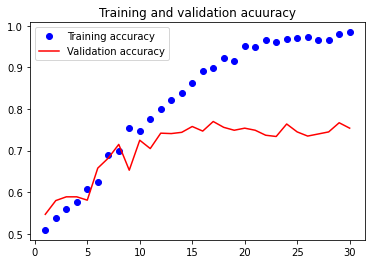

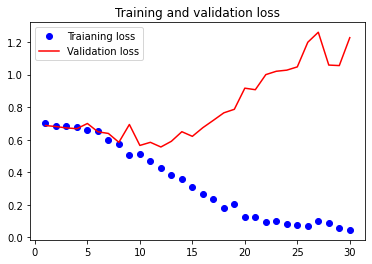

In [60]:
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1,len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo',label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r',label='Validation accuracy')
plt.title('Training and validation acuuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo', label = 'Traianing loss')
plt.plot(epochs,val_loss,'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [62]:
test_model = keras.models.load_model('convert_from_with_imagesGenerator_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
test_loss, test_acc

63/63 [==============================] - 4s 56ms/step - loss: 0.6172 - accuracy: 0.7040


(0.6172144412994385, 0.7039999961853027)

### 사전훈련된 모델 활용
VGG16 합성곱 기반 층 만들기

In [63]:
conv_base = keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top=False,
    input_shape = (256,256,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [64]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [85]:
import numpy as np
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)
  
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 23ms/step


In [86]:
train_features.shape, val_features.shape

((2000, 8, 8, 512), (1000, 8, 8, 512))

In [87]:
inputs = keras.Input(shape=(8,8,512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation = 'sigmoid')(x)
model = keras.Model(inputs,outputs)
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics=['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'feature_extraction.keras',
        save_best_only = True,
        monitor = 'val_loss'
    ),
    # keras.callbacks.EarlyStopping(patience = 3)
]
hist = model.fit(
    train_features, train_labels,
    epochs = 20,
    validation_data = (val_features, val_labels),
    callbacks = callbacks
)

Epoch 1/20
63/63 [==============================] - 1s 15ms/step - loss: 9.7406 - accuracy: 0.9445 - val_loss: 6.0782 - val_accuracy: 0.9730
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 3.1385 - accuracy: 0.9795 - val_loss: 8.3858 - val_accuracy: 0.9730
Epoch 3/20
63/63 [==============================] - 1s 12ms/step - loss: 1.5030 - accuracy: 0.9890 - val_loss: 6.0485 - val_accuracy: 0.9750
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.3557 - accuracy: 0.9935 - val_loss: 7.2375 - val_accuracy: 0.9730
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.2876 - accuracy: 0.9945 - val_loss: 9.4816 - val_accuracy: 0.9730
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.3816 - accuracy: 0.9980 - val_loss: 11.1130 - val_accuracy: 0.9690
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.0363 - accuracy: 0.9990 - val_loss: 7.5971 - val_accuracy: 0.9780
Epoch 8/20
63/63 

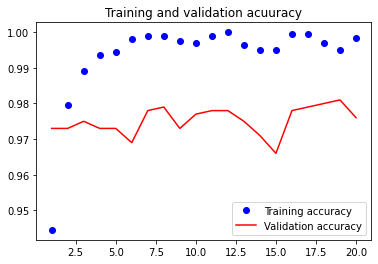

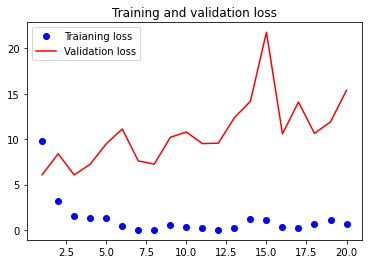

In [88]:
from numpy.random.mtrand import exponential
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1,len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo',label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r',label='Validation accuracy')
plt.title('Training and validation acuuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo', label = 'Traianing loss')
plt.plot(epochs,val_loss,'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [89]:
test_model = keras.models.load_model('feature_extraction.keras')
test_model.evaluate(test_features, test_labels)

#  >> 과적합

63/63 [==============================] - 1s 5ms/step - loss: 5.9569 - accuracy: 0.9795


[5.956944942474365, 0.9794999957084656]

### 데이터 증식을 사용해서 특성 추출
vgg 16합성곱 기반 층을 만들고 동결

In [91]:
conv_base = keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top = False
)
conv_base.trainable = False

In [93]:
# 동결 하기전과 후의 훈련 가능한 가중치 리스트를 출력
conv_base.trainable = True
print(f'합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수 :',len(conv_base.trainable_weights))

합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수 : 26


In [94]:
conv_base.trainable = False
print(f'합성곱 기반 층을 동결 후의 훈련 가능한 가중치 개수 :',len(conv_base.trainable_weights))

합성곱 기반 층을 동결 후의 훈련 가능한 가중치 개수 : 0


In [95]:
data_agumentation = keras.Sequential([
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)])
inputs = keras.Input(shape = (256,256,3))
x = data_agumentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)
hist = model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [99]:
callbacks=[keras.callbacks.ModelCheckpoint(
    filepath = 'feature_extraction_with_data_augumentation.keras',
    save_best_only=True,
    monitor = 'val_loss')]
hist = model.fit(train_dataset,epochs=10,validation_data=validation_dataset,
                 callbacks = callbacks)

Epoch 1/10
63/63 [==============================] - 23s 361ms/step - loss: 2.5446 - accuracy: 0.9870 - val_loss: 7.5539 - val_accuracy: 0.9750
Epoch 2/10
63/63 [==============================] - 24s 379ms/step - loss: 1.9408 - accuracy: 0.9890 - val_loss: 7.0609 - val_accuracy: 0.9790
Epoch 3/10
63/63 [==============================] - 23s 366ms/step - loss: 2.3199 - accuracy: 0.9875 - val_loss: 8.0900 - val_accuracy: 0.9770
Epoch 4/10
63/63 [==============================] - 23s 355ms/step - loss: 1.9771 - accuracy: 0.9850 - val_loss: 7.8387 - val_accuracy: 0.9780
Epoch 5/10
63/63 [==============================] - 23s 360ms/step - loss: 2.0165 - accuracy: 0.9860 - val_loss: 8.1588 - val_accuracy: 0.9810
Epoch 6/10
63/63 [==============================] - 24s 380ms/step - loss: 0.7156 - accuracy: 0.9940 - val_loss: 6.9942 - val_accuracy: 0.9750
Epoch 7/10
63/63 [==============================] - 23s 359ms/step - loss: 0.8793 - accuracy: 0.9915 - val_loss: 7.6900 - val_accuracy: 0.9820

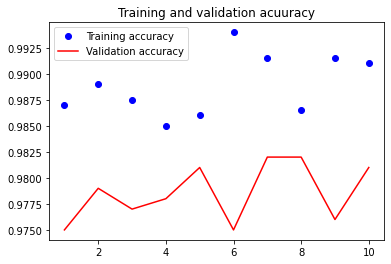

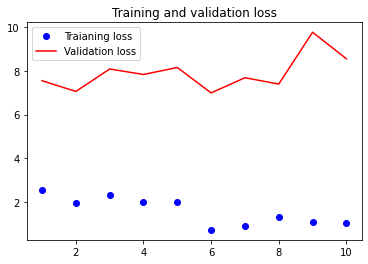

In [100]:
from numpy.random.mtrand import exponential
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1,len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo',label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r',label='Validation accuracy')
plt.title('Training and validation acuuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo', label = 'Traianing loss')
plt.plot(epochs,val_loss,'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [101]:
test_model = keras.models.load_model('feature_extraction_with_data_augumentation.keras')
test_model.evaluate(test_dataset)

63/63 [==============================] - 14s 213ms/step - loss: 4.9853 - accuracy: 0.9835


[4.985340595245361, 0.9835000038146973]

In [ ]:
conv_base.summary()

In [ ]:
# 마지막에서 4번째 층까지 동결
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable = False

In [ ]:
# 모델 미세 조정
model.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(learning_rate=1e-5),metrics=['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'fine_tuning.keras',
        save_best_only = True,
        monitor = 'val_loss'
    )
]
hist = model.fit(
    train_dataset,
    epochs = 10,
    validation_data = validation_dataset,
    callbacks = callbacks
)

Epoch 1/10
63/63 [==============================] - 69s 376ms/step - loss: 0.9889 - val_loss: 8.3370
Epoch 2/10
63/63 [==============================] - 24s 373ms/step - loss: 0.8604 - val_loss: 7.9625
Epoch 3/10
63/63 [==============================] - ETA: 0s - loss: 1.1623

In [ ]:
test_model = keras.models.load_model('fine_tuning.keras')
test_model.evaluate(test_dataset)